1. Batch Normalization

In [ ]:
#nn layers
linear1 = torch.nn.Linear(784, 32, bias=True)
linear2 = torch.nn.Linear(32, 32, biias=True)
linear3 = troch.nn.Linear(32, 10, bias=True)

relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32)
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784,  32, bias=True)
nn_linear2 = torch.nn.Linear(32, 32, bias=True)
nn_linear3 = torch.nn.Linear(32, 10, bias=True)

#with BN
bn_model = torch.nn.Sequential(linear1, bn1, relu,
                               linear2, bn2, relu
                               linear3),to(device)
#without BN
nn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3),to(device)

In [ ]:
#class module
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(100, 50)
        self.bn = nn.BatchNorm1d(num_features=50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
m = nn.BatchNorm1d(100)
input = torch.randn(20, 100)
output = m(input)

m = nn.BatchNorm2d(100)
input = torch.randn(20, 100, 35, 45)
output = m(input)

Question 1.

Compare & Contrast BatchNorm1d and BatchNorm2d

BatchNorm1d: input과 output이 (N, C)또는, (N, C, L)의 형태

BatchNorm2d: input과 output이 (N, C, H, W)의 형태
* N: Batch 크기
* C: Channel
* L: Length
* H: Height
* W: Width

2. Weight Initialization

In [2]:
import torch
import torch.nn as nn
import torch.nn.init as init

In [3]:
class CNN(nn.Module): #CNN class 를 정의
    def __init__(self):
        super(CNN,self).__init__() #superclass(nn.Module)의 initialization method 호출
        self.layer = nn.Sequential( #convolutional Neural Network 을 정의하기 위한 레이어를 순차적으로 쌓은 nn.Sequential 모듈 생성
            nn.Conv2d(1,16,3,padding=1), # 28 x 28 #입력 채널 1, 출력채널 16, channel 크기 3x3, 패딩1)
            nn.ReLU(),
            nn.Conv2d(16,32,3,padding=1), # 28 x 28
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 14 x 14 # channel크기 2x2, strike 2
            nn.Conv2d(32,64,3,padding=1), # 14 x 14
            nn.ReLU(),
            nn.MaxPool2d(2,2) # 7 x 7
        )
        self.fc_layer = nn.Sequential( #fully connected 레이어를 정의하기 위한 레이어를 순차적으로 쌓은 nn.Sequential 모듈 생성
            nn.Linear(64*7*7,100), #Linear 레이어: input dim(64*7*7), output dim(100)
            nn.ReLU(),
            nn.Linear(100,10)
        )

 #초기화 하는 방법
 #모델의 모듈을 차례대로 불러옴
        for m in self.modules(): # 모델의 모든 모듈에 대해 반복하는 루프를 시
            # 만약 그 모듈이 nn.Conv2d인 경
            if isinstance(m, nn.Conv2d):

                #kaming Initialization
                #모듈의 가중치를 kaming he normal로 초기화
                #bias를 0으로 초기화
                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)

            # 만약 그 모듈이 nn.Linear인 경우
            elif isinstance(m, nn.Linear):

                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)

    def forward(self,x): #forwardfeed method를 정의
        out = self.layer(x)
        out = out.view(batch_size,-1) # 출력을 (batch_siza, -1)로 flatten
        out = self.fc_layer(out)
        return out

In [5]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

#sigmoid activation function 정의
#주로 이진 분류 문제에서 사용
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#ReLU activation function 정의
#주로 hidden layer 에서 사용
def ReLU(x):
    return np.maximum(0, x)

#tanh activation function 정의
#-1과 1 사이의 값 출력
#입력이 큰 양수 또는 음수일 때 더 민감한 반응
def tanh(x):
    return np.tanh(x)

#가중치 초기화 함수 정
def weight_init(method=None):
    w = 0 # 가중치 행렬을 초기화 하기 위한 변수 w를 0으로 초기화
    if method == 'large': #large: 정규분포를 따르는 큰 가중치 행렬 생성
        w = np.random.randn(node_num, node_num) * 1 # 평균 0, 표준편차 1 인 정규분포 따르는 rnadom number로 초기화
    elif method == 'small': #small: 정규분포를 따르는 작은 가중치 행렬 생성
        w = np.random.randn(node_num, node_num) * 0.01 # 평균 0, 표준편차 0.01
    elif method == 'xavier': #xavier initialization
        w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    elif method == 'he': #he initialization
        w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    return w

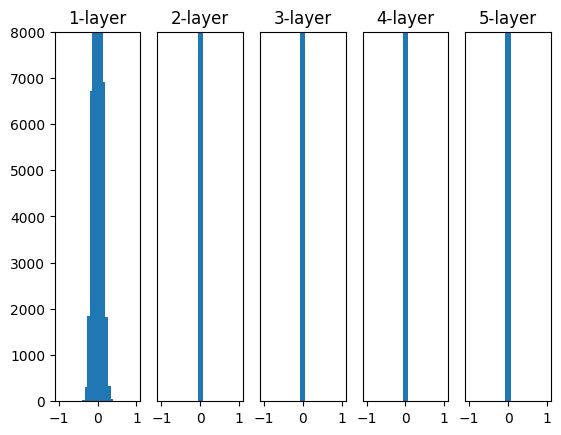

In [8]:
input_data = np.random.randn(1000, 100) # 1000 sample with 100 features each
node_num = 100 # 각 hidden layer의 neuron의 개수 정
hidden_layer_size = 5
activations = {} # activation function 통과한 결과 저장을 위한 dictionary 초기화

x = input_data

for i in range(hidden_layer_size): # 0 부터 hidden_layer_size - 1 까지 반복하는 루프 시작
    if i != 0: # 현재 0번째 hidden layer가 아닌 경우, input을 이전 hidden layer의 activation function 결과로 업데이트
        x = activations[i-1]

    w = weight_init('small') #small method로 weight matrix 초기화
    a = np.dot(x, w) #weight와 input의 inner product로 linear 변환

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a) #nonlinearity 추가

    activations[i] = z # 현재 hidden layer의 activation function 결과를 dictionary 에 저장

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1) # 현재 hidden layer의 히스토그램 그릴 위치 설정
    plt.title(str(i+1) + "-layer") # 현재 플롯에 제목을 추가
    if i != 0: plt.yticks([], []) # y축 눈금을 제거
#     plt.xlim(0.1, 1)
    plt.ylim(0, 8000)
    plt.hist(a.flatten(), 30, range=(-1,1)) #현재 hidden layer의 activation function 결과를 히스토그램으로 표시
plt.show()

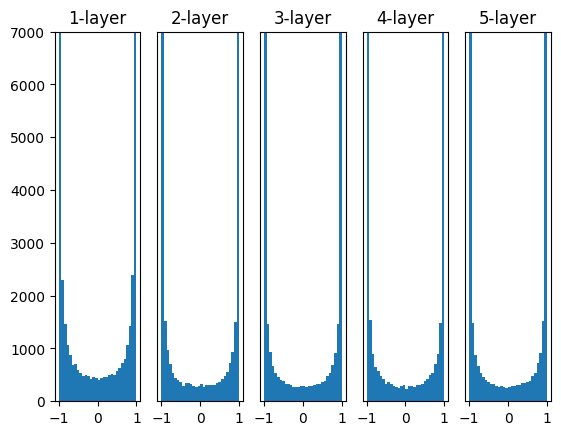

In [10]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('large')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1)) #a.flatten(): a를 1차원으로 flatten # 히스토그램의 막대(bin) 수 30개 #range=(-1,1): 히스토그램의 x축 범위 지정
plt.show()

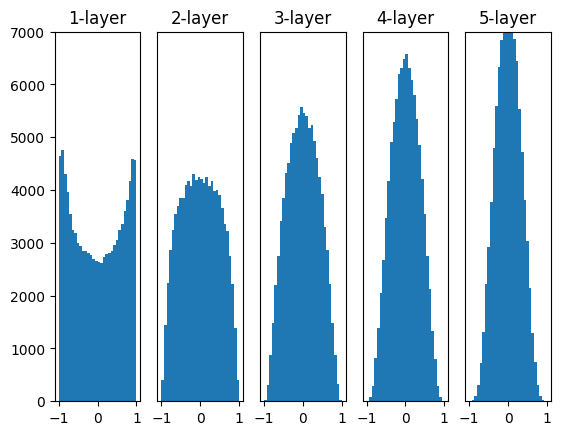

In [11]:
# Xavier Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

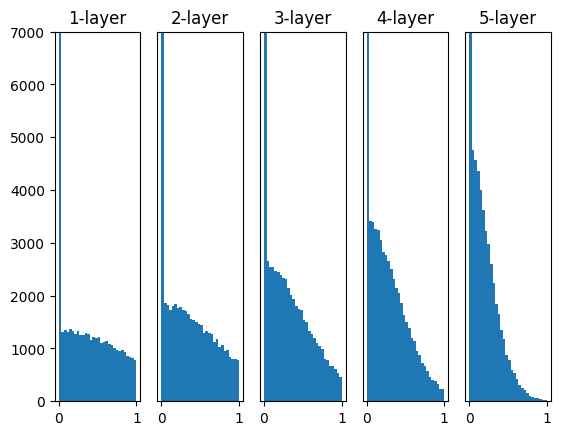

In [12]:
# He Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

3. CNN

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1)
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1)
    self.fc1 = nn.Linear(10 * 12 * 12, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.conv1(x))
    print("After conv1", x.size())
    x = F.relu(self.conv2(x))
    print("After conv2", x.size())
    x = x.view(-1, 10 * 12 * 12)
    print("Ater dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20)) # input size

Before torch.Size([10, 1, 20, 20])
After conv1 torch.Size([10, 3, 16, 16])
After conv2 torch.Size([10, 10, 12, 12])
Ater dimension reduction torch.Size([10, 1440])
After fc1 torch.Size([10, 50])
After fc2 torch.Size([10, 10])


* Input size [batch size, channel, height, width]


* Conv1: [10, 1, 20, 20] -> [10. 3, 16, 16]

, because Conv1's out channel size is 3, and kernel size is 5. (so the height and width each decreased by 4)

* Conv2: [10, 3, 16, 16] -> [10, 10, 12, 12]

, becuase Con2's out channel size is 10, and kernel size is 5

* Dimesion reduction: [10, 10, 12, 12] -> [10, 1440]

, because the number of channel remains 10 and view(-1, 10 * 12 * 12) flattens the tensor form a 4-dimensional shape to a 2-dimensinal shape, where each data point now corresponds to a vector of 1440 features.

-1 is a special value that allows the function to automatically adjust the size of the remaining dimension.

* Fc1: [10, 1440] -> [10, 50]


, because fc1's output size is 50

* Fc2: [10, 50] -> [10, 10]

, because fc2's ouput size is 10

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.max_pool1 = nn.MaxPool2d(kernel_size=2)
    self.max_pool2 = nn.MaxPool2d(kernel_size=2)
    self.fc1 = nn.Linear(10 * 5 * 5, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.max_pool1(x))
    print("After max_pool1", x.size())
    x = F.relu(self.max_pool2(x))
    print("After max_pool2",x.size())
    x = x.view(-1, 10 * 5 * 5)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))

Before torch.Size([10, 1, 20, 20])
After max_pool1 torch.Size([10, 1, 10, 10])
After max_pool2 torch.Size([10, 1, 5, 5])
After dimension reduction torch.Size([1, 250])
After fc1 torch.Size([1, 50])
After fc2 torch.Size([1, 10])


* max_pool1: [10, 1, 20, 20] -> [10. 1, 10, 10]

* max_pool2: [10, 1, 10, 10] -> [10, 1, 5, 5]

, because max pooling reduces the height and width by half

* Dimesion reduction: [10, 1, 5, 5] -> [1, 250]

, because the number of channel remains 1, and viwe(-1, 10 * 5 * 5) flattens the tensor form a 4-dimensional shape to a 2-dimensinal shape, where each data point now corresponds to a vector of 250 features.


* Fc1: [1, 250] -> [1, 50]


, because fc1's output size is 50

* Fc2: [10, 50] -> [10, 10]

, because fc2's ouput size is 10

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [22]:
train_data = datasets.MNIST('./data/.', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=50, shuffle=True)

test_data = datasets.MNIST('./data/', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=50, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 163451595.35it/s]

Extracting ./data/./MNIST/raw/train-images-idx3-ubyte.gz to ./data/./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 44145661.01it/s]

Extracting ./data/./MNIST/raw/train-labels-idx1-ubyte.gz to ./data/./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 47247440.81it/s]


Extracting ./data/./MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21261750.86it/s]


Extracting ./data/./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/./MNIST/raw



In [25]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(-1, 4 * 4 * 50) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [27]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

In [28]:
cnn.train()
for epoch in range(10):
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if index % 100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index,loss.item()))

loss of 0 epoch, 0 index : 2.2956647872924805
loss of 0 epoch, 100 index : 1.2183887958526611
loss of 0 epoch, 200 index : 0.4595516622066498
loss of 0 epoch, 300 index : 0.35710254311561584
loss of 0 epoch, 400 index : 0.21703235805034637
loss of 0 epoch, 500 index : 0.33062079548835754
loss of 0 epoch, 600 index : 0.3517047166824341
loss of 0 epoch, 700 index : 0.22104772925376892
loss of 0 epoch, 800 index : 0.13680344820022583
loss of 0 epoch, 900 index : 0.2125152051448822
loss of 0 epoch, 1000 index : 0.20757120847702026
loss of 0 epoch, 1100 index : 0.16271203756332397
loss of 1 epoch, 0 index : 0.03939054161310196
loss of 1 epoch, 100 index : 0.16770271956920624
loss of 1 epoch, 200 index : 0.01395329087972641
loss of 1 epoch, 300 index : 0.26823925971984863
loss of 1 epoch, 400 index : 0.05891585350036621
loss of 1 epoch, 500 index : 0.2279970794916153
loss of 1 epoch, 600 index : 0.0819949060678482
loss of 1 epoch, 700 index : 0.06393706798553467
loss of 1 epoch, 800 index : 

In [29]:
cnn.eval() # CNN 모델을 평가모드로 설정(ex. dropout과 같은 정규화 기법이 비활성화됨)
test_loss = 0
correct = 0 # 테스트 손실 test_loss 및 정확도 correct를 추적하기 위한 변수를 초기화
with torch.no_grad(): # 이 블록 내에서 gradient 계산이 비활성화됨
  for data, target in test_loader: # test_lloader를 사용하여 test dataset의 batch를 반복
     output = cnn(data) #CNN 모델에 입력 데이터'data'를 전달하여 모델의 output 얻어냄
     test_loss += criterion(output, target).item() # 손실함수'criterion' 사용하여 손실계산하고 test_loss에 누적
     pred = output.argmax(dim=1, keepdim=True) # 각 sample에 대한 예측 class 를 얻어냄. # argmax(dim=1): 두 번째 차원에서 최댓값의 index를 반환
     correct += pred.eq(target.view_as(pred)).sum().item() # 예측 클래스와 실제 레이블을 비교하여 정확하게 분류된 sample의 수를 누
  print('\nTest set: Average loss:[:,4f], Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(test_loader.dataset),
          100. * correct / len(test_loader.dataset))) # 반복이 끝난 후 test set 에 대한 평균 손실과 정확도를 출력


Test set: Average loss:[:,4f], Accuracy: 8.32133934093872/9863 (10000%)

